<a href="https://colab.research.google.com/github/HJyeoh/Heart-Disease-Prediction-using-Machine-Learning/blob/main/Heart_Disease_Prediction_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML use case : Heart disease prediction

Our objective is to predict the likelihood of heart disease based on various health features of patients.

The health features are as follows:

# Data Set 1: "heart_disease.csv" (14 columns, 303 rows)

    Features         Description
    1.  age          : Age of the patient.
    2.  sex      	 : Gender of the patient (1 = male; 0 = female).
    3.  cp           : Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).
    4.  trestbps   	 : Resting blood pressure (in mm Hg on admission to the hospital).
    5.  chol      	 : Serum cholesterol in mg/dl.
    6.  fbs          : Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
    7.  restecg      : Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable left ventricular hypertrophy).
    8.  thalach      : Maximum heart rate achieved.
    9.  exang     	 : Exercise-induced angina (1 = yes; 0 = no).
    10. oldpeak      : ST depression induced by exercise relative to rest.
    11. slope      	 : The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
    12. ca        	 : Number of major vessels (0-4) colored by fluoroscopy.
    13. thal       	 : Thalassemia (0 = normal; 1 = fixed defect; 2 = reversible defect, 3 = non-fixed defect).
    14. target     	 : Diagnosis of heart disease (1 = presence of heart disease; 0 = absence of heart disease).


In [1]:
# For Data Processing
import pandas as pd

# For Graph Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For features selection
from sklearn.ensemble import RandomForestClassifier

#Import models from scikit learn module:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics   #import metrics model to check the accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Data Preprocessing

In [ ]:
# Load data
df = pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Check for missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Check for duplicated values
df.duplicated().sum()

1

In [ ]:
# Drop duplicated value
df1 = df.drop_duplicates()
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Check for data types
df1.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Insights:

- The dataset contains 303 rows and 14 columns with one column designated as the target variable, resulting in 303 samples and 13 features.

- There are no missing values in the dataset.

- 1 sample in the dataset is duplicated.

- After cleaning, the dataset consists of 302 samples and 13 features.

- The features are categorised into three groups: numerical, binary, and categorical. Since all features are represented by numerical values, no encoding is necessary.

# Features Analysis

target
1    164
0    138
Name: count, dtype: int64


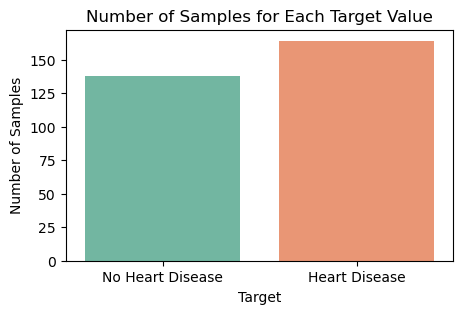

In [ ]:
# Check the number of samples for each target value
target_counts = df1['target'].value_counts()
print(target_counts)

# Plot the counts
plt.figure(figsize=(5, 3))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='Set2')

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Number of Samples')
plt.title('Number of Samples for Each Target Value')
plt.xticks(ticks=[1, 0], labels=['Heart Disease', 'No Heart Disease'])
plt.show()

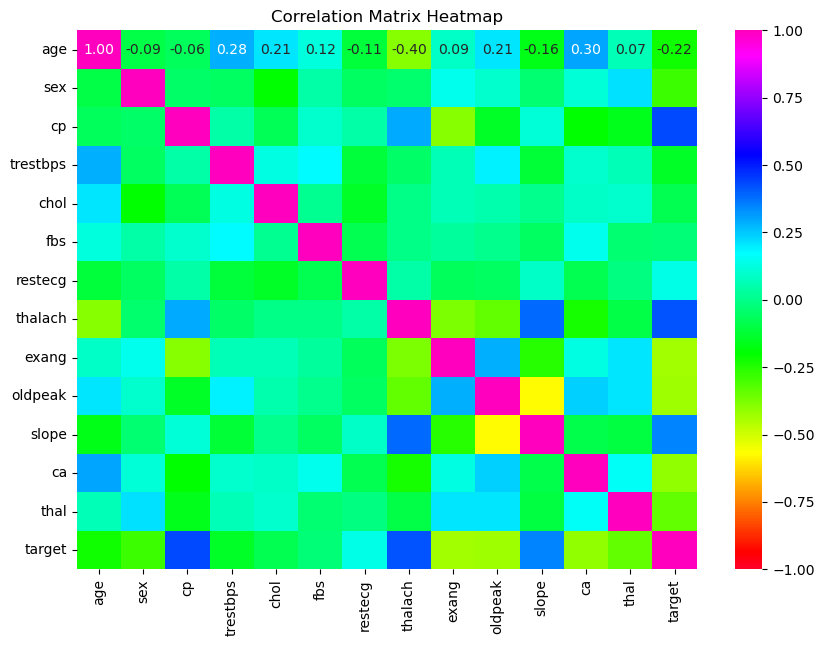

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [ ]:
# Check relationship between features
corr = df1.corr()

# Plot heatmap to present correlation
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='gist_rainbow', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

corr

### Insights:

1. **Sample Distribution**:
   - Out of 302 samples, 164 have heart disease, and 138 do not.

2. **Correlation Analysis**:
   - **Higher Correlation with Target**:
     - Chest Pain Type (cp)  -> 0.432080
     - Maximum Heart Rate Achieved (thalach) -> 0.419955
     - Slope of Peak Exercise ST Segment (slope) -> 0.343940
   - **Lower Correlation with Target**:
     - Exercise-Induced Angina (exang) -> -0.435601
     - ST Depression Induced by Exercise (oldpeak) -> -0.429146
     - Number of Major Vessels Colored by Fluoroscopy (ca) ->  -0.408992

In [ ]:
# Get summary of numerical variables
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


numerical features (boxplot)


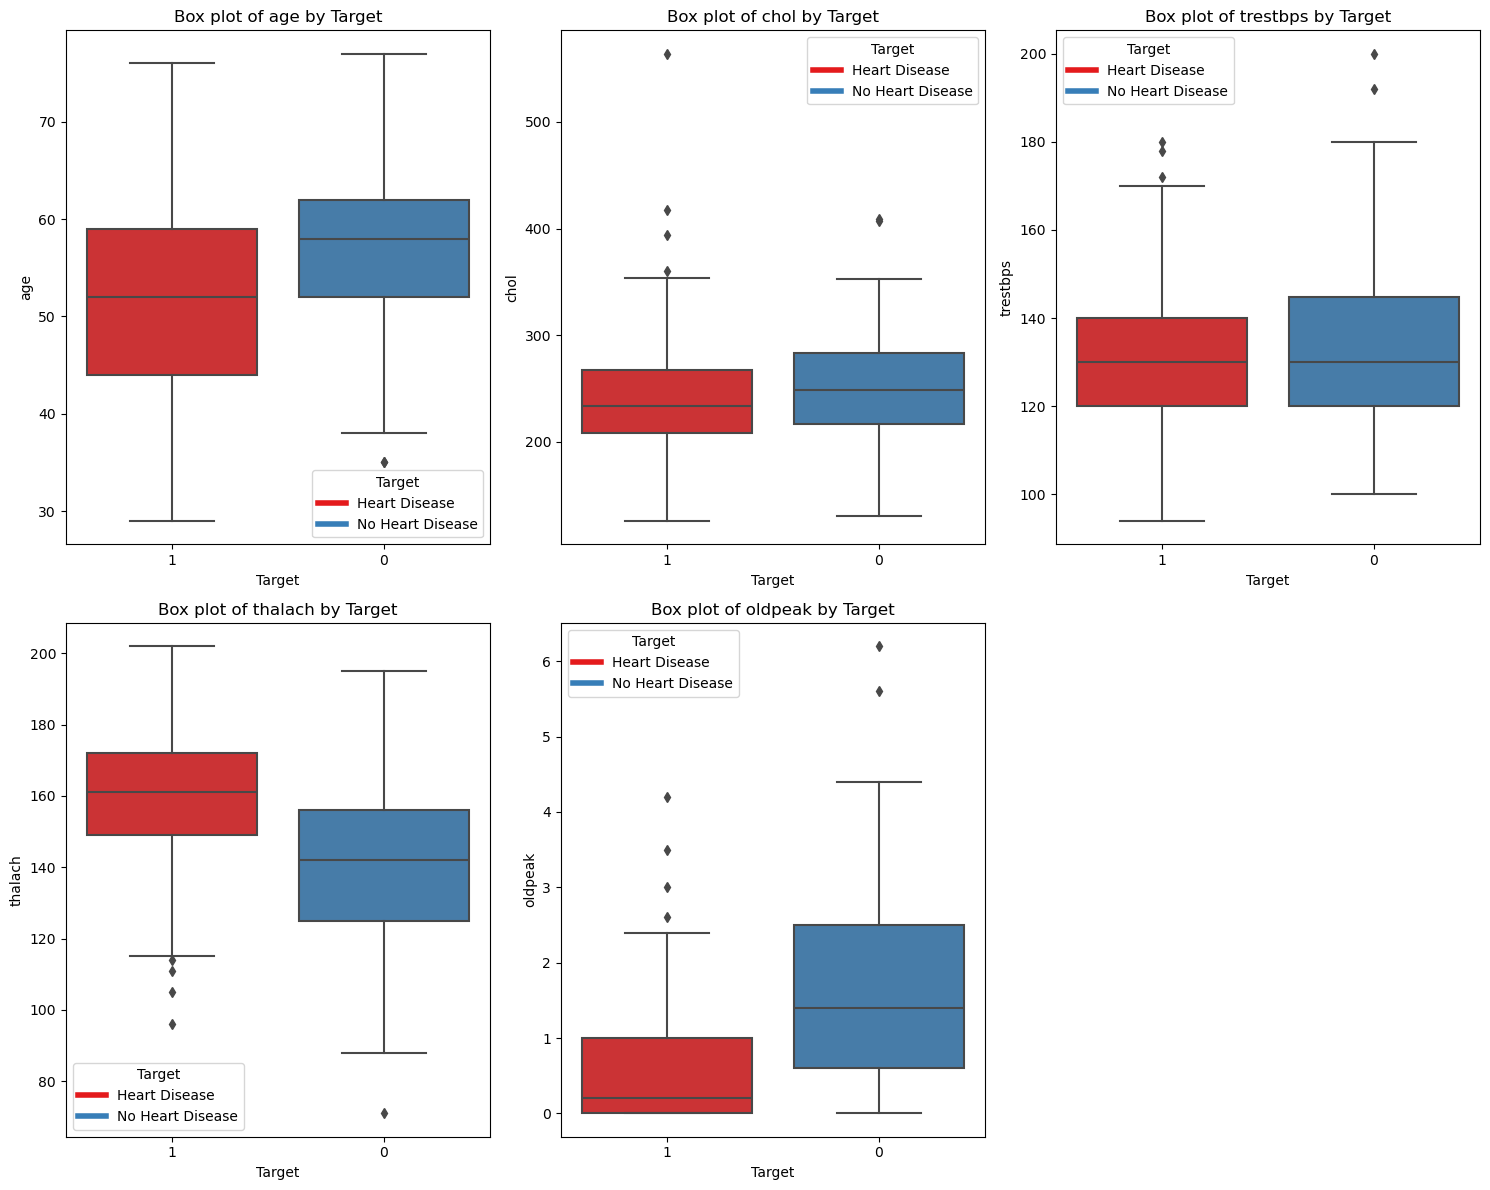

binary features (countplot)


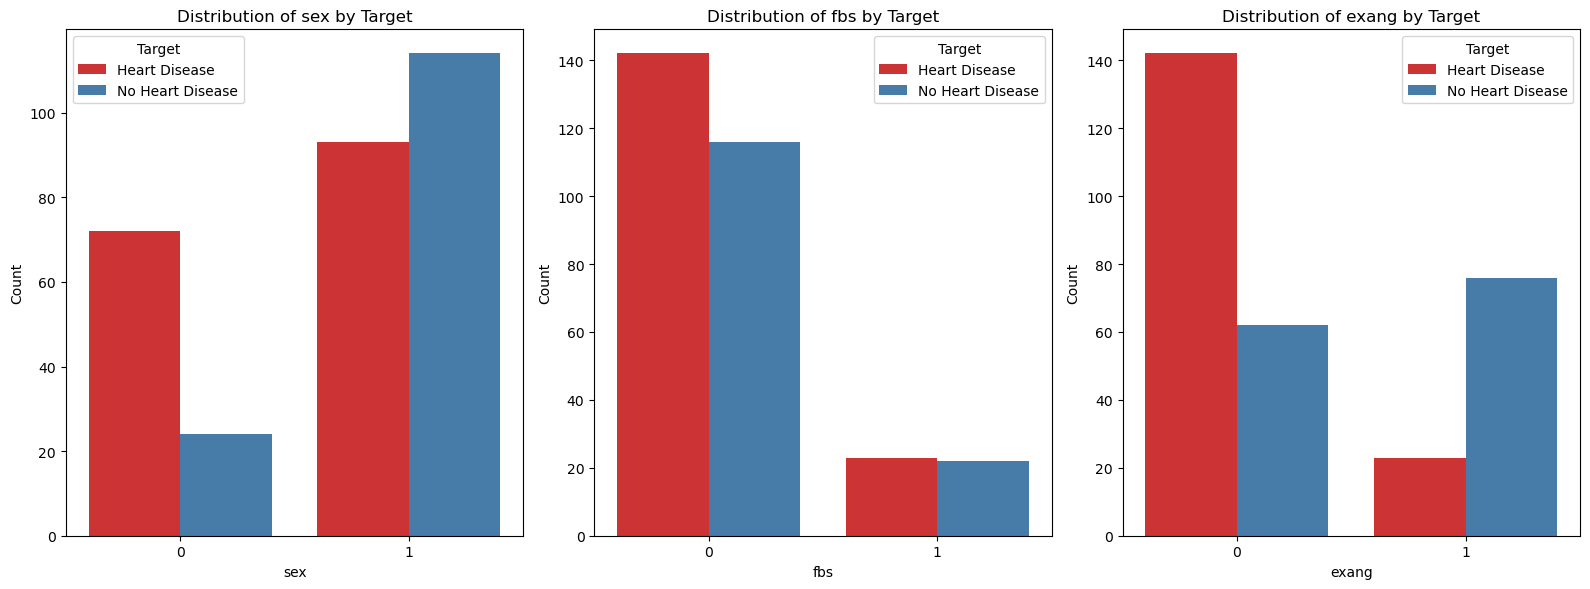

categorical features (countplot)


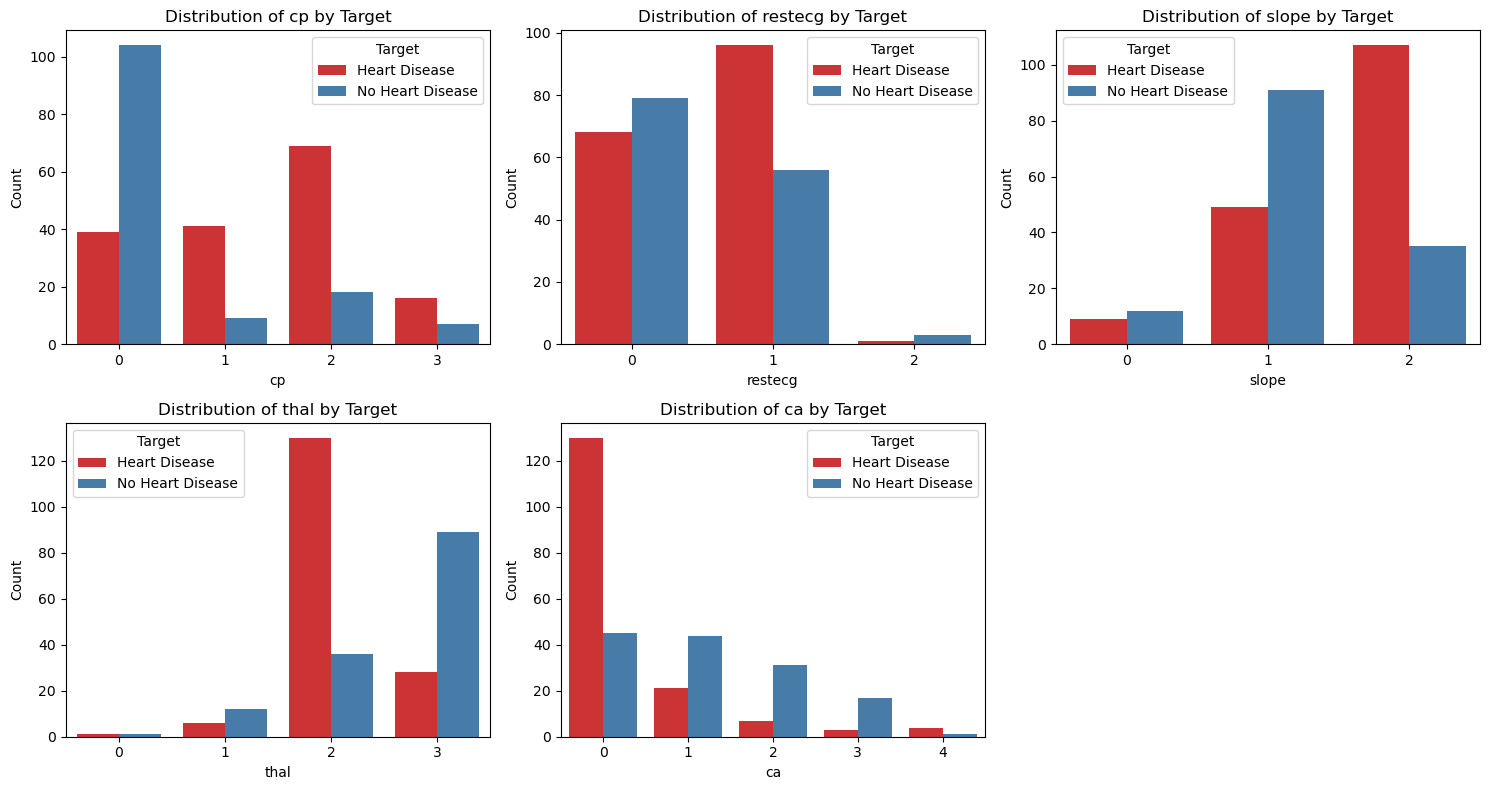

In [ ]:
# Define feature groups
numerical_feats = df[['age', 'chol', 'trestbps', 'thalach', 'oldpeak']]
binary_feats = df[['sex', 'fbs', 'exang']]
categorical_feats = df[['cp', 'restecg', 'slope', 'thal', 'ca']]

# Ensure the 'target' column is of string type
df['target'] = df['target'].astype(str)

# Plotting numerical features (boxplot) in a single subplot grid
print("numerical features (boxplot)")
plt.figure(figsize=(15, 12))

# Define the colors
colors = sns.color_palette('Set1', n_colors=2)

for i, feature in enumerate(numerical_feats):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=feature, data=df, palette='Set1')
    plt.title(f'Box plot of {feature} by Target')
    plt.xlabel('Target')
    plt.ylabel(feature)

    # Manually add the legend
    handles = [plt.Line2D([0], [0], color=colors[0], lw=4),
               plt.Line2D([0], [0], color=colors[1], lw=4)]
    labels = ['Heart Disease', 'No Heart Disease']
    plt.legend(handles, labels, title='Target')

plt.tight_layout()
plt.show()


# Plotting binary features (countplot) in a single subplot grid
print("binary features (countplot)")
plt.figure(figsize=(16, 6))

for i, feature in enumerate(binary_feats):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=feature, hue='target', data=df, palette='Set1', order=[0, 1])
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['Heart Disease', 'No Heart Disease'])
    plt.tight_layout()

plt.show()

# Plotting categorical features (countplot) in a single subplot grid
print("categorical features (countplot)")
plt.figure(figsize=(15, 8))

for i, feature in enumerate(categorical_feats):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=feature, hue='target', data=df, palette='Set1')
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['Heart Disease', 'No Heart Disease'])
    plt.tight_layout()

plt.show()


### Key Findings from Feature Analysis

**Numerical Features (boxplot):**
- **Age:** Median age is lower in individuals with heart disease.
- **Cholesterol (chol):** Lower levels are more prevalent in those with heart disease.
- **Resting Blood Pressure (trestbps)**: The median values are close between both groups. However, for individuals with heart disease, the upper range of resting blood pressure tends to be lower, indicating a lower occurrence of high blood pressure compared to those without heart disease.
- **Maximum Heart Rate (thalach):** Higher median for heart disease cases.
- **ST Depression (oldpeak):** Lower median for heart disease cases.


**Binary Features (countplot):**
- **Sex:** Males (1) show a higher incidence of heart disease.
- **Fasting Blood Sugar (fbs):** Fasting blood sugar < 120 mg/dl (0) shows a higher incidence of heart disease.
- **Exercise Induced Angina (exang):** More prevalent in heart disease cases.


**Categorical Features (countplot):**
- **Chest Pain Type (cp):** Typical angina (0) correlates with higher heart disease frequency.
- **Resting Electrocardiographic Results (restecg):** Normal  (0) results associated with higher heart disease incidence.
- **Slope of Peak Exercise ST Segment (slope):** Downward (2) or flat slopes (1) show higher heart disease rates.
- **Thalassemia (thal):** Non-fixed (3) defect linked to increased heart disease prevalence.
- **Number of Major Vessels (ca):** More vessels affected in heart disease cases.

### Insights
- **Risk Factors:** Older age, higher cholesterol, typical angina, abnormal ECG, and certain exercise test results may indicate higher heart disease risk.



# Features Selection

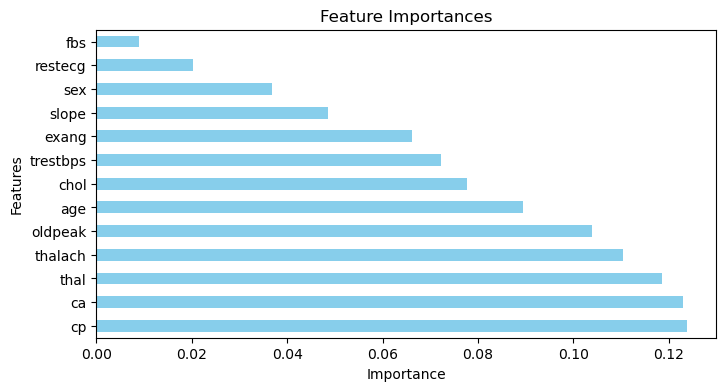

In [ ]:
# Define features and target
X = df1.drop('target', axis=1)  # All 13 features except the target variable
y = df1['target']  # Target variable

# Fit the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)

# Plot
plt.figure(figsize=(8, 4))
feature_importances.nlargest(13).plot(kind='barh', color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Since each of the features has shown some importance towards the target variable, we will use all 13 features to build the model.

# Step 2: Split the data (80% Train Set, 20% Test Set)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets (80:20)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=77)

# Select numerical columns to scale
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create subsets of training and testing data with only the columns to scale
X_train_scaled  = X_train.copy()
X_test_scaled = X_test.copy()

# Apply scaling only to the selected columns
scaler = StandardScaler()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train_scaled[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test_scaled[columns_to_scale])

In [ ]:
#shape of train and test objects
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(241, 13)
(61, 13)


In [ ]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(241,)
(61,)


# Step 3: Training and Evaluation

## 1) KNN (K-Nearest Neighbours)


#### a) Finding optimal K value for KNN

In [ ]:
#Running from k=1 through 25 and record testing accuracy
k_range = range(1,25)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k) #default is 5
        knn.fit(X_train_scaled,y_train)
        y_pred=knn.predict(X_test_scaled)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

#Testing accuracy for each value of K
scores

{1: 0.7704918032786885,
 2: 0.8852459016393442,
 3: 0.8360655737704918,
 4: 0.8032786885245902,
 5: 0.8852459016393442,
 6: 0.8524590163934426,
 7: 0.8524590163934426,
 8: 0.8524590163934426,
 9: 0.8688524590163934,
 10: 0.8524590163934426,
 11: 0.8852459016393442,
 12: 0.8360655737704918,
 13: 0.8688524590163934,
 14: 0.8688524590163934,
 15: 0.8852459016393442,
 16: 0.8852459016393442,
 17: 0.8852459016393442,
 18: 0.8852459016393442,
 19: 0.8852459016393442,
 20: 0.8852459016393442,
 21: 0.8852459016393442,
 22: 0.8852459016393442,
 23: 0.8852459016393442,
 24: 0.8852459016393442}

#### b) Visualise accuracy of different K values

Text(0, 0.5, 'Testing Accuracy')

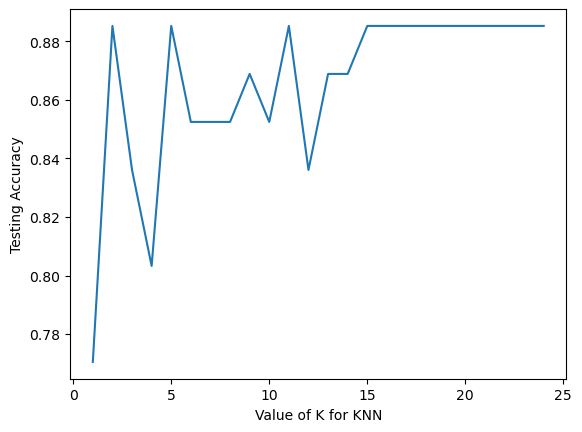

In [ ]:
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### K value with 5 has the highest accuracy (88.52) , so we choose 5 as K and train the model

#### c) KNN Model Building


In [ ]:
# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train models with 80% train dataset
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions with 20% test dataset
knn_preds = knn.predict(X_test_scaled)
knn_preds

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
# Calculate and print performance metrics
print("KNN Test Set Metrics:")
print ('Accuracy:', accuracy_score(y_test, knn_preds))
print ('Precision:', precision_score(y_test, knn_preds, average="weighted"))
print ('Recall:', recall_score(y_test, knn_preds))
print ('F1-Score:', f1_score(y_test, knn_preds, average="weighted"))
confusion = confusion_matrix(y_test, knn_preds)
print('Confusion matrix:')
print(confusion)

KNN Test Set Metrics:
Accuracy: 0.8852459016393442
Precision: 0.9048380647740903
Recall: 1.0
F1-Score: 0.8820555749331473
Confusion matrix:
[[20  7]
 [ 0 34]]


In [ ]:
# Inverse transform the scaled test data back to original values
X_test_original = X_test_scaled.copy()
X_test_original[columns_to_scale] = scaler.inverse_transform(X_test_scaled[columns_to_scale])

# Convert to DataFrame for display in table form
X_test_original_df = pd.DataFrame(X_test_original, columns=X_test.columns)

# Add the target values and predictions to the DataFrame
X_test_original_df['Target'] = y_test.values
X_test_original_df['Prediction'] = knn_preds

# Display the DataFrame
X_test_original_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target,Prediction
8,52.0,1,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,1,1
37,54.0,1,2,150.0,232.0,0,0,165.0,0,1.6,2,0,3,1,1
142,42.0,0,2,120.0,209.0,0,1,173.0,0,0.0,1,0,2,1,1
65,35.0,0,0,138.0,183.0,0,1,182.0,0,1.4,2,0,2,1,1
256,58.0,1,0,128.0,259.0,0,0,130.0,1,3.0,1,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41.0,1,0,110.0,172.0,0,0,158.0,0,0.0,2,0,3,0,1
21,44.0,1,2,130.0,233.0,0,1,179.0,1,0.4,2,0,2,1,1
15,50.0,0,2,120.0,219.0,0,1,158.0,0,1.6,1,0,2,1,1
172,58.0,1,1,120.0,284.0,0,0,160.0,0,1.8,1,0,2,0,1


In [ ]:
# Make predictions with 80% train dataset
knn_preds = knn.predict(X_train_scaled)
knn_preds

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [ ]:
# Calculate and print performance metrics
print("KNN Train Set Metrics:")
print ('Accuracy:', accuracy_score(y_train, knn_preds))
print ('Precision:', precision_score(y_train, knn_preds, average="weighted"))
print ('Recall:', recall_score(y_train, knn_preds))
print ('F1-Score:', f1_score(y_train, knn_preds, average="weighted"))
confusion = confusion_matrix(y_train, knn_preds)
print('Confusion matrix:')
print(confusion)

KNN Train Set Metrics:
Accuracy: 0.8547717842323651
Precision: 0.8559228282494825
Recall: 0.9
F1-Score: 0.854133050784306
Confusion matrix:
[[ 89  22]
 [ 13 117]]


## 2) Decision Tree

In [ ]:
# Initialize models
decision_tree = DecisionTreeClassifier(random_state=2)

In [ ]:
# Train models with 80% train dataset
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=2)

In [ ]:
# Make predictions with 20% test dataset
decision_tree_preds = decision_tree.predict(X_test_scaled)
decision_tree_preds

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [ ]:
# Calculate and print performance metrics
print("Decision Tree Test Set Metrics:")
print ('Accuracy:', accuracy_score(y_test, decision_tree_preds))
print ('Precision:', precision_score(y_test, decision_tree_preds, average="weighted"))
print ('Recall:', recall_score(y_test, decision_tree_preds))
print ('F1-Score:', f1_score(y_test, decision_tree_preds, average="weighted"))
confusion = confusion_matrix(y_test, decision_tree_preds)
print('Confusion matrix:')
print(confusion)

Decision Tree Test Set Metrics:
Accuracy: 0.8524590163934426
Precision: 0.8522788686723114
Recall: 0.8823529411764706
F1-Score: 0.8521362578840489
Confusion matrix:
[[22  5]
 [ 4 30]]


In [ ]:
# Add the predictions as a new column
X_test_original_df['Prediction'] = decision_tree_preds

# Display the DataFrame
X_test_original_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target,Prediction
8,52.0,1,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,1,1
37,54.0,1,2,150.0,232.0,0,0,165.0,0,1.6,2,0,3,1,1
142,42.0,0,2,120.0,209.0,0,1,173.0,0,0.0,1,0,2,1,1
65,35.0,0,0,138.0,183.0,0,1,182.0,0,1.4,2,0,2,1,1
256,58.0,1,0,128.0,259.0,0,0,130.0,1,3.0,1,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41.0,1,0,110.0,172.0,0,0,158.0,0,0.0,2,0,3,0,1
21,44.0,1,2,130.0,233.0,0,1,179.0,1,0.4,2,0,2,1,1
15,50.0,0,2,120.0,219.0,0,1,158.0,0,1.6,1,0,2,1,1
172,58.0,1,1,120.0,284.0,0,0,160.0,0,1.8,1,0,2,0,0


In [ ]:
# Make predictions with 80% train dataset
decision_tree_preds = decision_tree.predict(X_train_scaled)
decision_tree_preds

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
      dtype=int64)

In [ ]:
# Calculate and print performance metrics
print("Decision Tree Train Set Metrics:")
print ('Accuracy:', accuracy_score(y_train, decision_tree_preds))
print ('Precision:', precision_score(y_train, decision_tree_preds, average="weighted"))
print ('Recall:', recall_score(y_train, decision_tree_preds))
print ('F1-Score:', f1_score(y_train, decision_tree_preds, average="weighted"))
confusion = confusion_matrix(y_train, decision_tree_preds)
print('Confusion matrix:')
print(confusion)

Decision Tree Train Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion matrix:
[[111   0]
 [  0 130]]


## 3) SVM (Support Vector Machine)

In [ ]:
# Initialize models
svm = SVC()

In [ ]:
# Train models with 80% train dataset
svm.fit(X_train_scaled, y_train)

SVC()

In [ ]:
# Make predictions with 20% test dataset
svm_preds = svm.predict(X_test_scaled)
svm_preds

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
# Calculate and print performance metrics
print("SVM Test Set Metrics:")
print ('Accuracy:', accuracy_score(y_test, svm_preds))
print ('Precision:', precision_score(y_test, svm_preds, average="weighted"))
print ('Recall:', recall_score(y_test, svm_preds))
print ('F1-Score:', f1_score(y_test, svm_preds, average="weighted"))
confusion = confusion_matrix(y_test, svm_preds)
print('Confusion matrix:')
print(confusion)

SVM Test Set Metrics:
Accuracy: 0.8688524590163934
Precision: 0.8813817330210771
Recall: 0.9705882352941176
F1-Score: 0.8659725299069561
Confusion matrix:
[[20  7]
 [ 1 33]]


In [ ]:
# Add the predictions as a new column
X_test_original_df['Prediction'] = svm_preds

# Display the DataFrame
X_test_original_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target,Prediction
8,52.0,1,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,1,1
37,54.0,1,2,150.0,232.0,0,0,165.0,0,1.6,2,0,3,1,1
142,42.0,0,2,120.0,209.0,0,1,173.0,0,0.0,1,0,2,1,1
65,35.0,0,0,138.0,183.0,0,1,182.0,0,1.4,2,0,2,1,1
256,58.0,1,0,128.0,259.0,0,0,130.0,1,3.0,1,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41.0,1,0,110.0,172.0,0,0,158.0,0,0.0,2,0,3,0,1
21,44.0,1,2,130.0,233.0,0,1,179.0,1,0.4,2,0,2,1,1
15,50.0,0,2,120.0,219.0,0,1,158.0,0,1.6,1,0,2,1,1
172,58.0,1,1,120.0,284.0,0,0,160.0,0,1.8,1,0,2,0,1


In [ ]:
# Make predictions with 80% train dataset
svm_preds = svm.predict(X_train_scaled)
svm_preds

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [ ]:
# Calculate and print performance metrics
print("SVM Train Set Metrics:")
print ('Accuracy:', accuracy_score(y_train, svm_preds))
print ('Precision:', precision_score(y_train, svm_preds, average="weighted"))
print ('Recall:', recall_score(y_train, svm_preds))
print ('F1-Score:', f1_score(y_train, svm_preds, average="weighted"))
confusion = confusion_matrix(y_train, svm_preds)
print('Confusion matrix:')
print(confusion)

SVM Train Set Metrics:
Accuracy: 0.8879668049792531
Precision: 0.8916581343967235
Recall: 0.9461538461538461
F1-Score: 0.8871499760340118
Confusion matrix:
[[ 91  20]
 [  7 123]]


# Conclusion
| Model           | Dataset        | Accuracy   | Precision | Recall     | F1-Score   | Confusion Matrix          |
|-----------------|----------------|------------|-----------|------------|------------|---------------------------|
| KNN             | Train (80%)    | 0.854772   | 0.855923  | 0.900000   | 0.854133   | [[ 89  22],               |
|                 |                |            |           |            |            |  [ 13 117]]               |
|                 | Test (20%)     | 0.885246   | 0.904838  | 1.000000   | 0.882056   | [[20  7],                 |
|                 |                |            |           |            |            |  [ 0 34]]                 |
|                 | Difference     | +0.030474  | -0.026655 | +0.100000  | +0.052534  |                           |
|-----------------|----------------|------------|-----------|------------|------------|---------------------------|
| Decision Tree   | Train (80%)    | 1.000000   | 1.000000  | 1.000000   | 1.000000   | [[111   0],               |
|                 |                |            |           |            |            |  [  0 130]]               |
|                 | Test (20%)     | 0.852459   | 0.852279  | 0.882353   | 0.852136   | [[22  5],                 |
|                 |                |            |           |            |            |  [ 4 30]]                 |
|                 | Difference     | -0.147541  | -0.147721 | -0.117647  | -0.147864  |                           |
|-----------------|----------------|------------|-----------|------------|------------|---------------------------|
| SVM             | Train (80%)    | 0.887967   | 0.891658  | 0.946154   | 0.887150   | [[ 91  20],               |
|                 |                |            |           |            |            |  [  7 123]]               |
|                 | Test (20%)     | 0.868852   | 0.881381  | 0.970588   | 0.865973   | [[20  7],                 |
|                 |                |            |           |            |            |  [ 1 33]]                 |
|                 | Difference     | -0.019115  | -0.066658 | +0.024434  | +0.004742  |                           |


The champion model is KNN, with the highest accuracy of 88.52% on the test set. It also shows a very small difference between its performance on the training and test sets. Importantly, KNN had 0 false negatives in the test set, meaning it correctly identified all positive cases without mistakenly classifying any as negative.



